# Part_02_EDA

Here the saved data from P01 is loaded and some analysis is done. Later is fed into the LSTM for modeling.

In [4]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [5]:
import sys
# print(sys.executable)

In [6]:
# !/Users/amin/Desktop/proj/env/bin/python -m pip install matplotlib

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
%config InlineBackend.figure_format = 'retina'


### Read data

In [10]:
csv_path = "../Data/jena_climate_2009_2016.csv"
df = pd.read_csv(csv_path)

let's get an intuition of feathers in data by printing the data first 5 rows.

In [11]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [9]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [10]:
df.columns.size

15

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Tdew (degC),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


### Basic plots

In [13]:
# plt.figure(figsize=(15,5))

# plt.subplot(1, 3, 1)
# plt.hist(df['p (mbar)'], bins=25,  ec='k', log=False, color=('b'))
# plt.title('non-log scale', fontsize=12)
# plt.legend(['p (mbar)'])
# plt.xlabel('p (mbar)'); plt.ylabel('count')

# plt.subplot(1, 3, 2)
# plt.hist(df['p (mbar)'], bins=25,  ec='k', log=True, color=('b'))
# plt.title('log scale', fontsize=12)
# plt.legend(['p (mbar)'])
# plt.xlabel('p (mbar)'); plt.ylabel('count')

# plt.subplot(1, 3, 3)
# plt.plot(df['p (mbar)'],'k-')
# plt.xlabel("time")
# plt.ylabel("p (mbar)")
# plt.title("pressure")

build a function for above plot.

In [17]:
def plot_df(col_name):
    plt.figure(figsize=(15,5))

    plt.subplot(1, 3, 1)
    plt.hist(df[col_name], bins=25,  ec='k', log=False, color=('b'))
    plt.title('non-log scale', fontsize=12)
    plt.legend([col_name])
    plt.xlabel(col_name); plt.ylabel('count')

    plt.subplot(1, 3, 2)
    plt.hist(df[col_name], bins=25,  ec='k', log=True, color=('b'))
    plt.title('log scale', fontsize=12)
    plt.legend([col_name])
    plt.xlabel(col_name); plt.ylabel('count')

    plt.subplot(1, 3, 3)
    plt.plot(df[col_name],'k-')
    plt.xlabel("time")
    plt.ylabel(col_name)
    plt.title(col_name)

    col_name = col_name.replace(' ', '_')
    col_name = col_name.replace('/', '_')
#     plt.savefig(f'../Figures/plot_P02_EDA_{col_name}.png')
    addres = '../Figures/'
    plt.savefig(addres + f'plot_P02_EDA_{col_name}.png')
    plt.show()

select the columns and pass it to the plot function.

In [18]:
cols = ['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)']

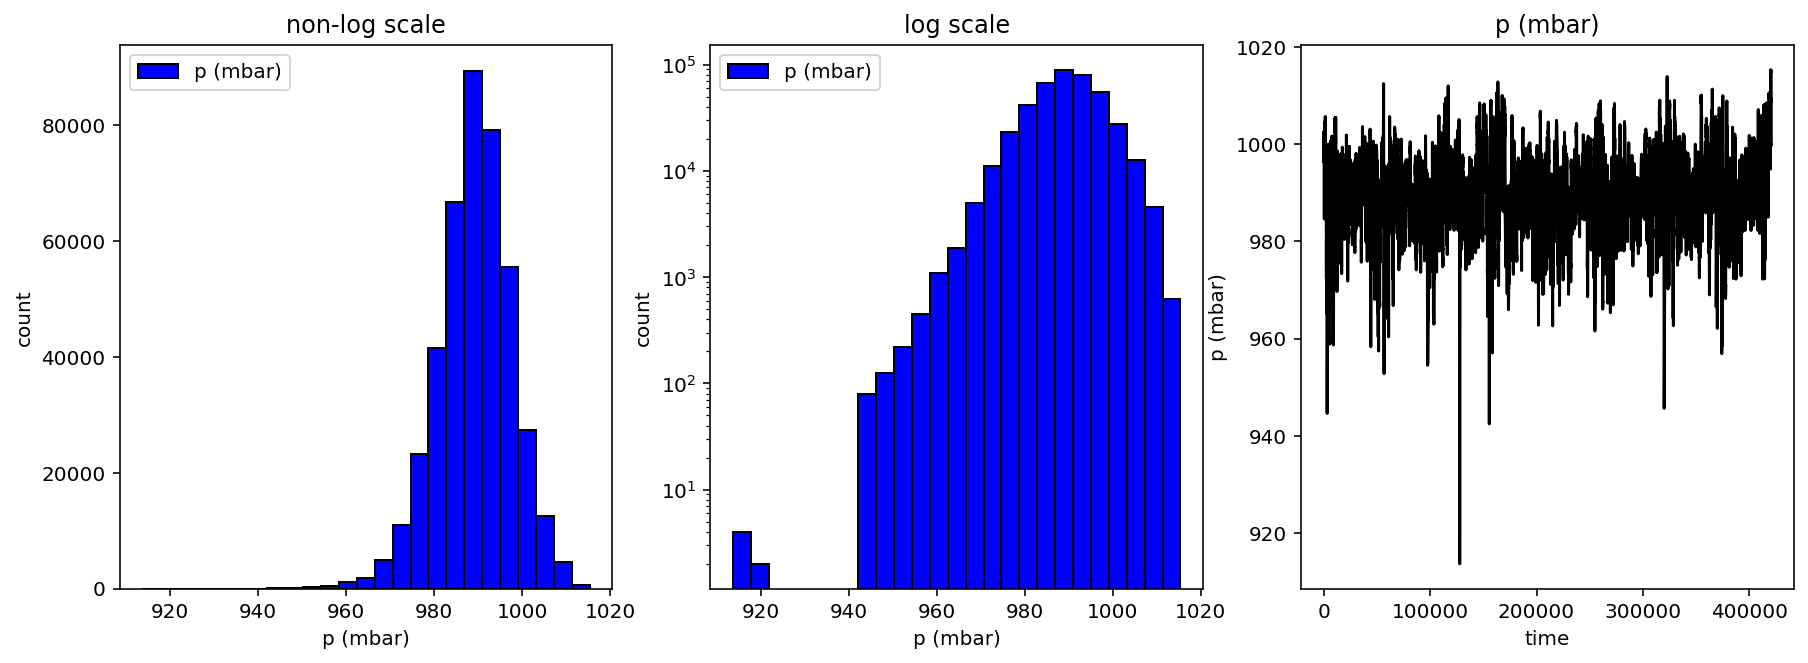

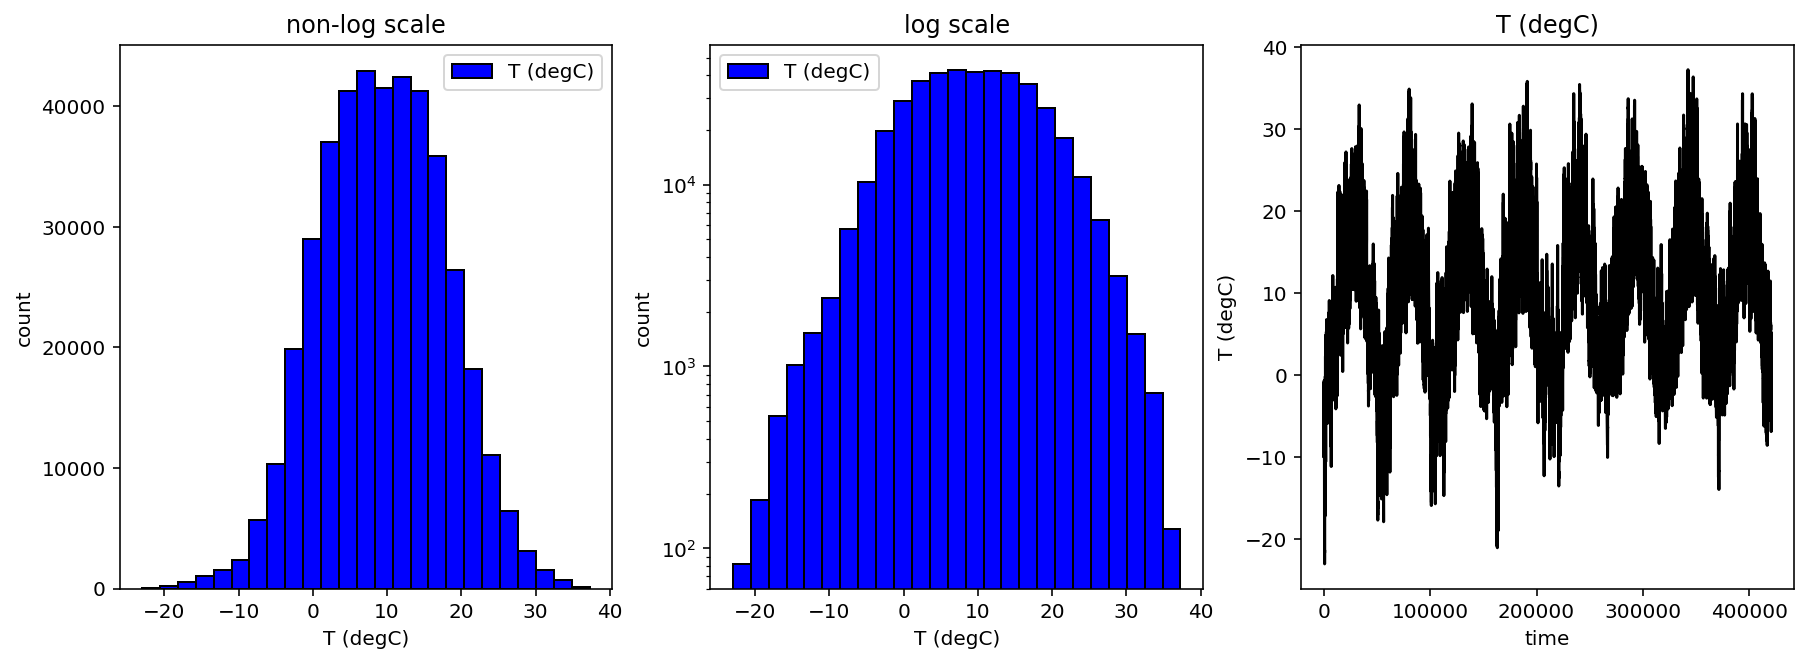

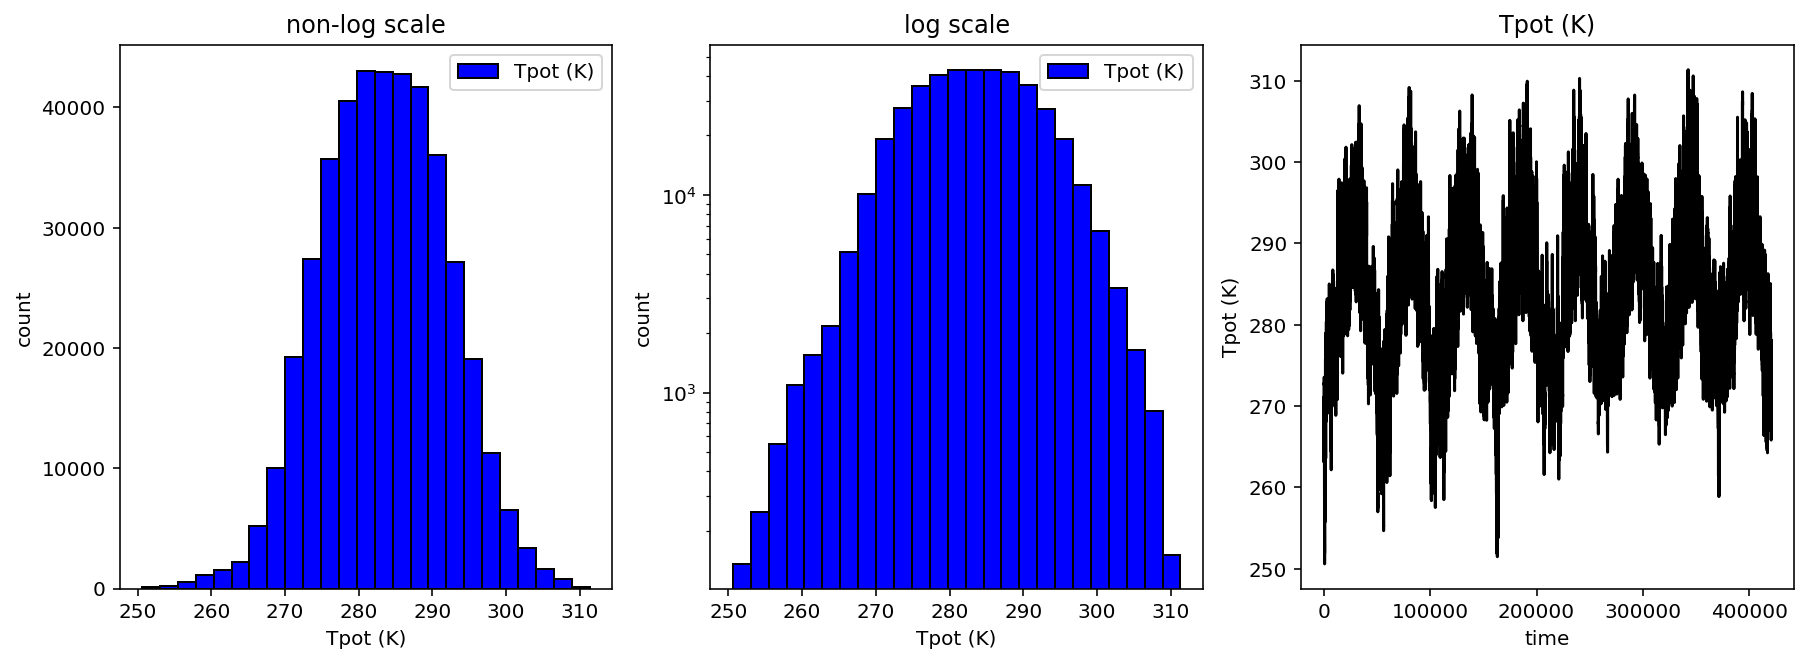

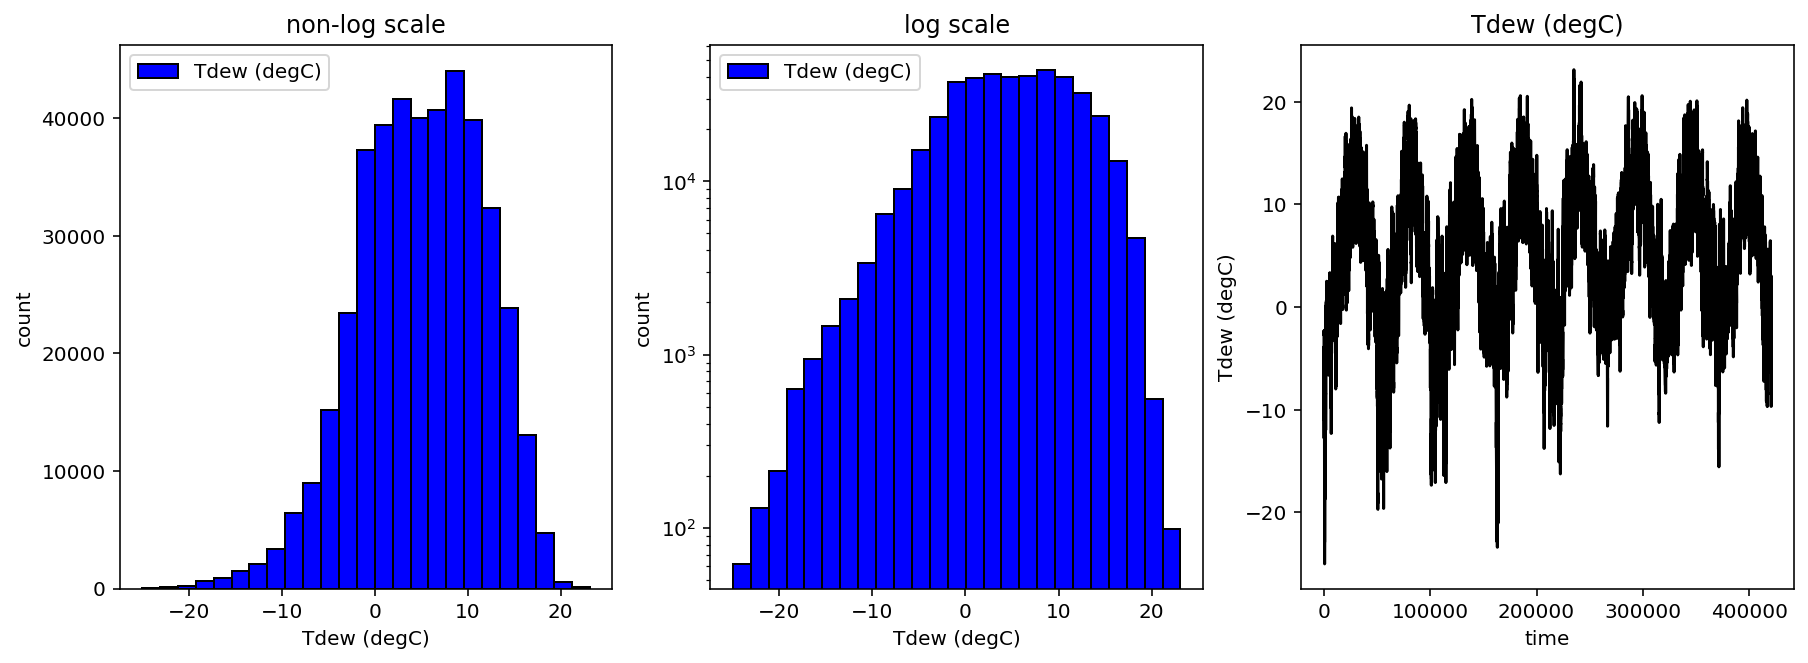

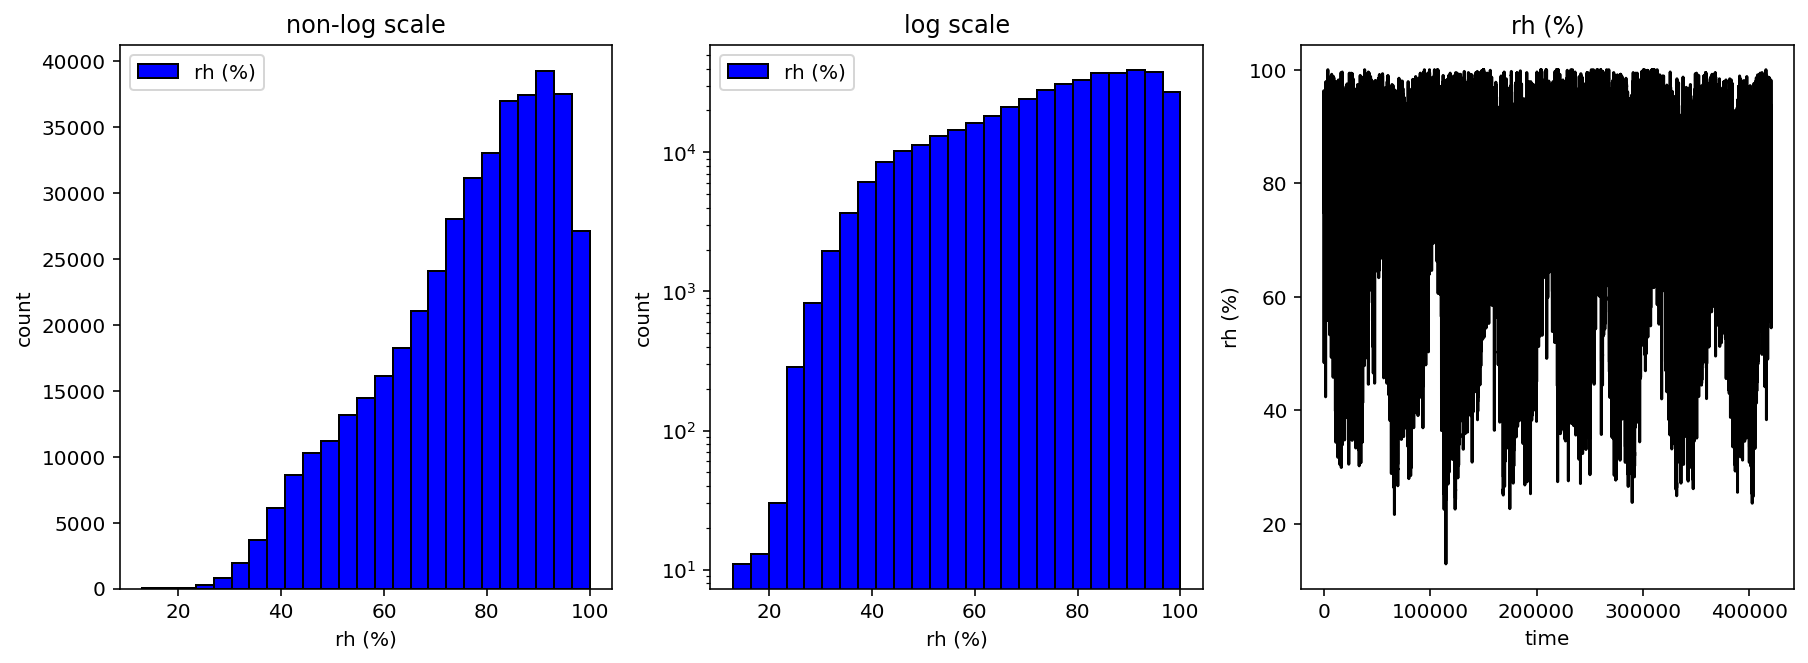

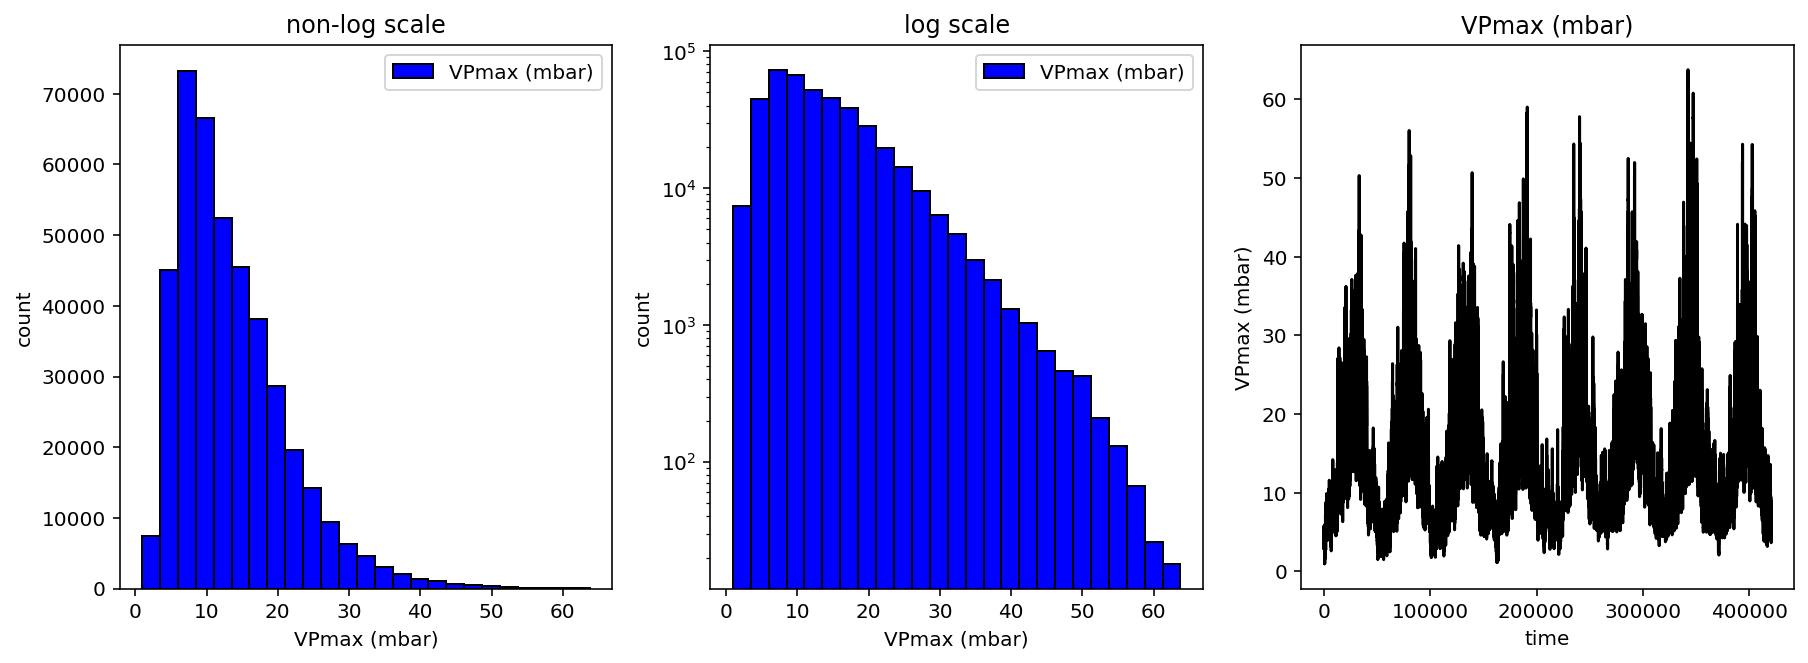

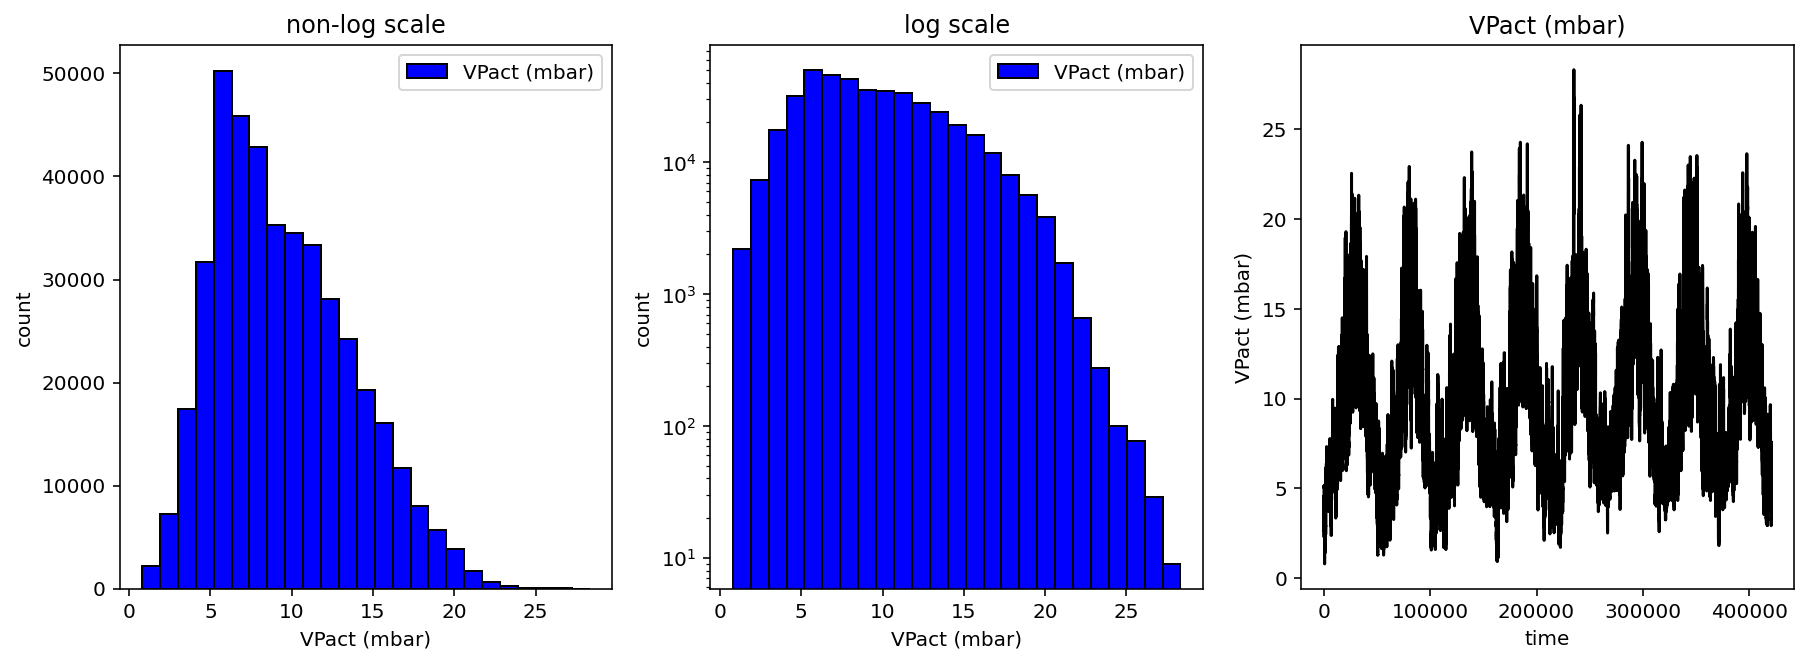

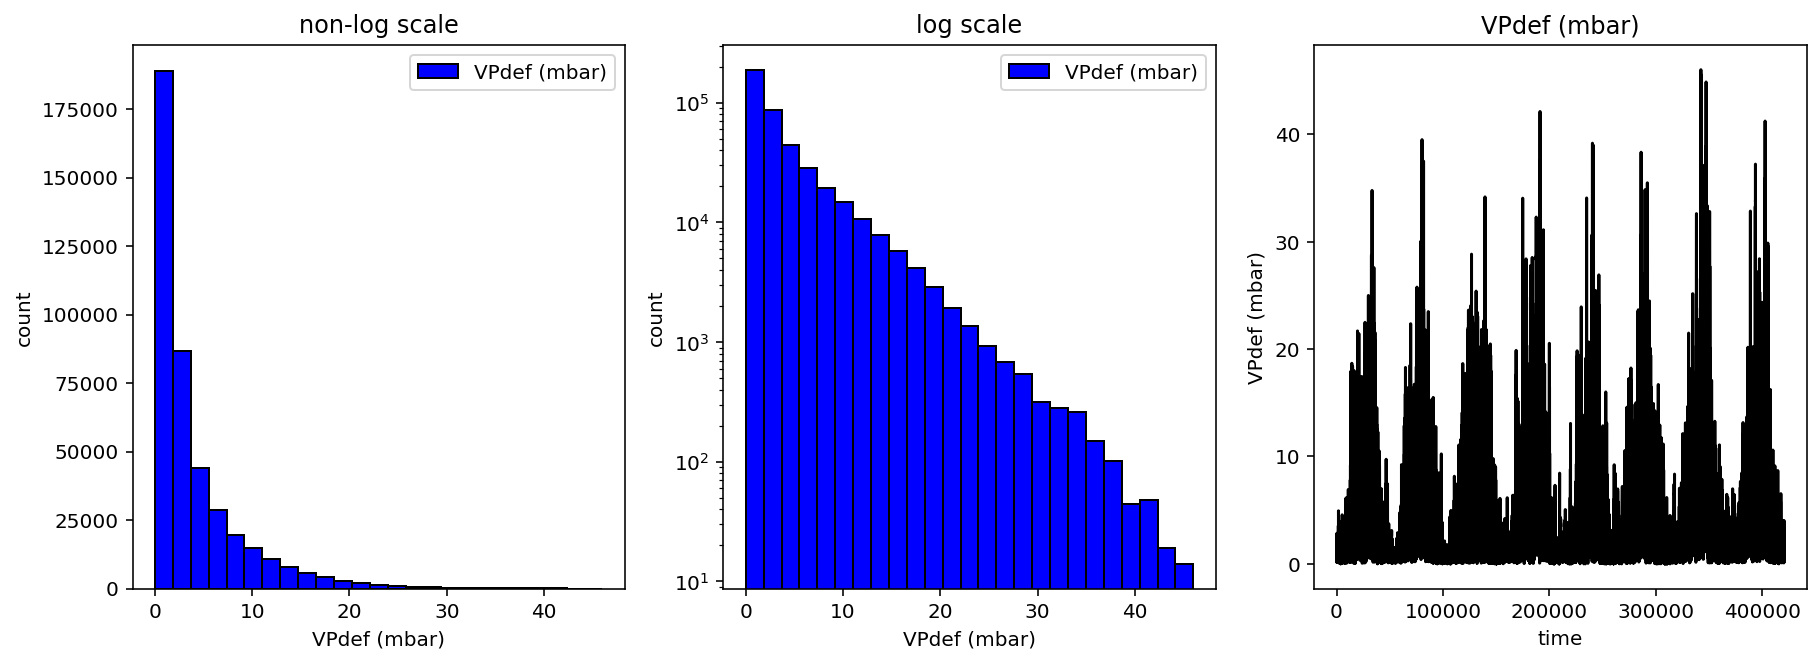

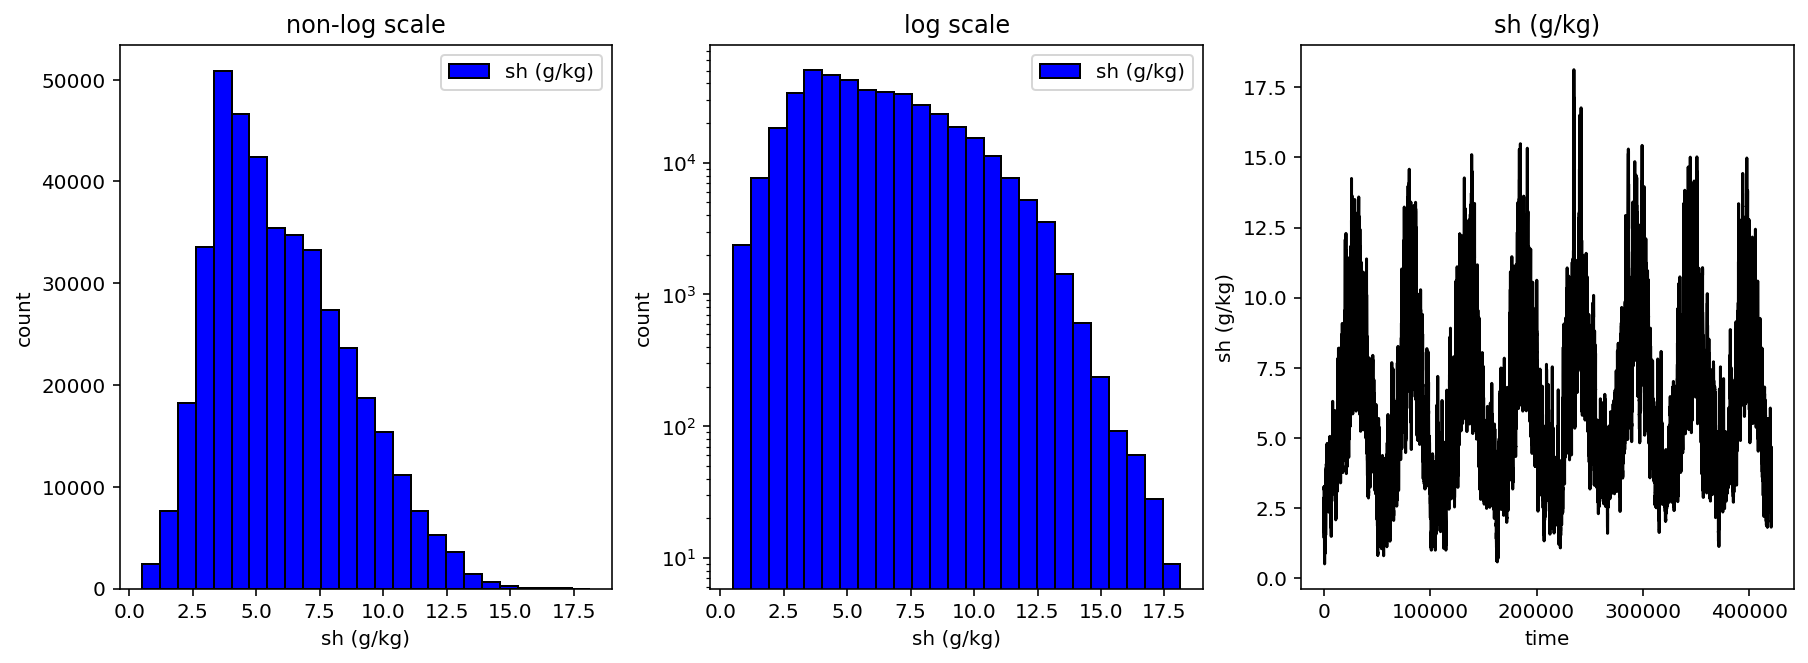

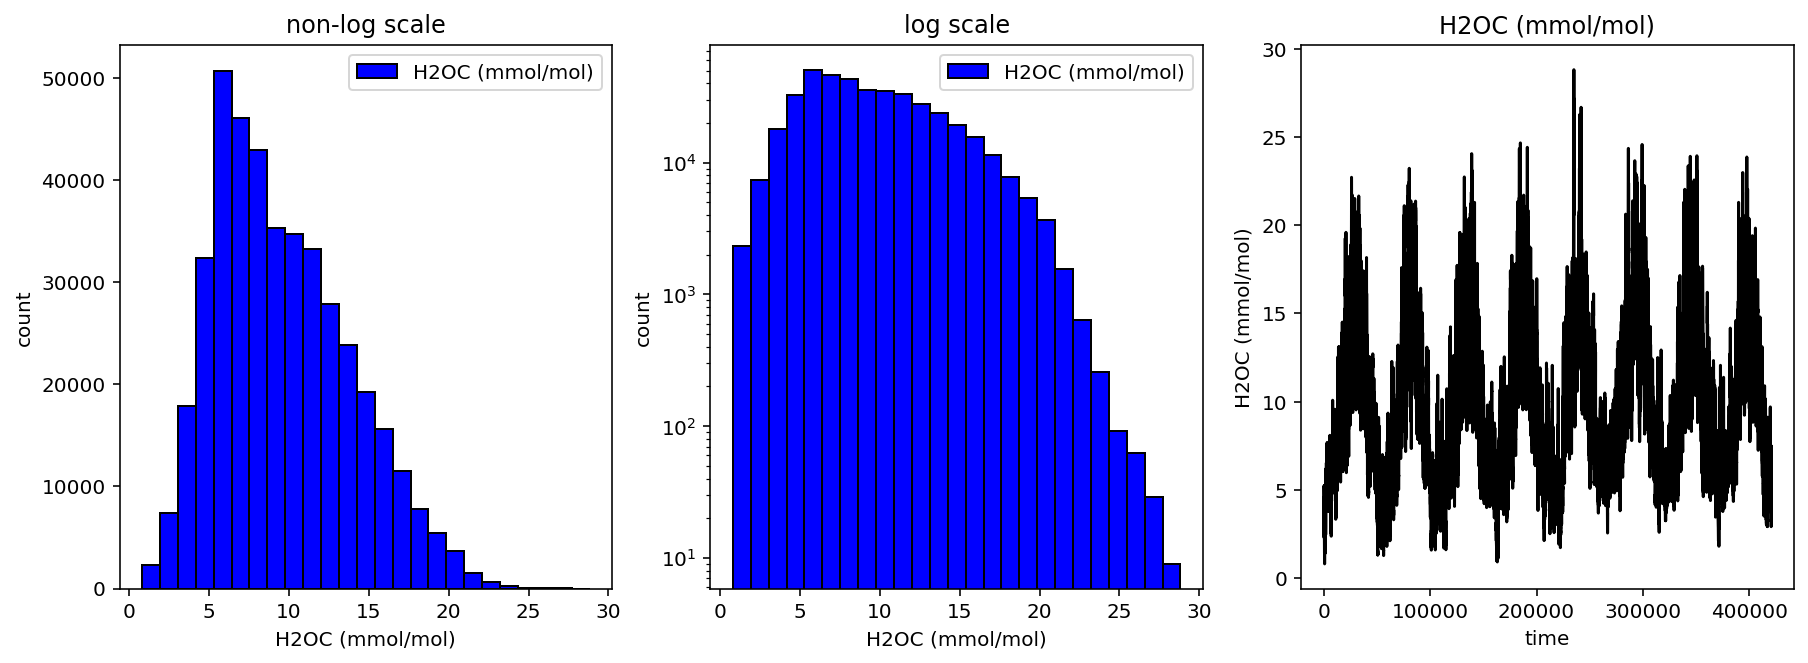

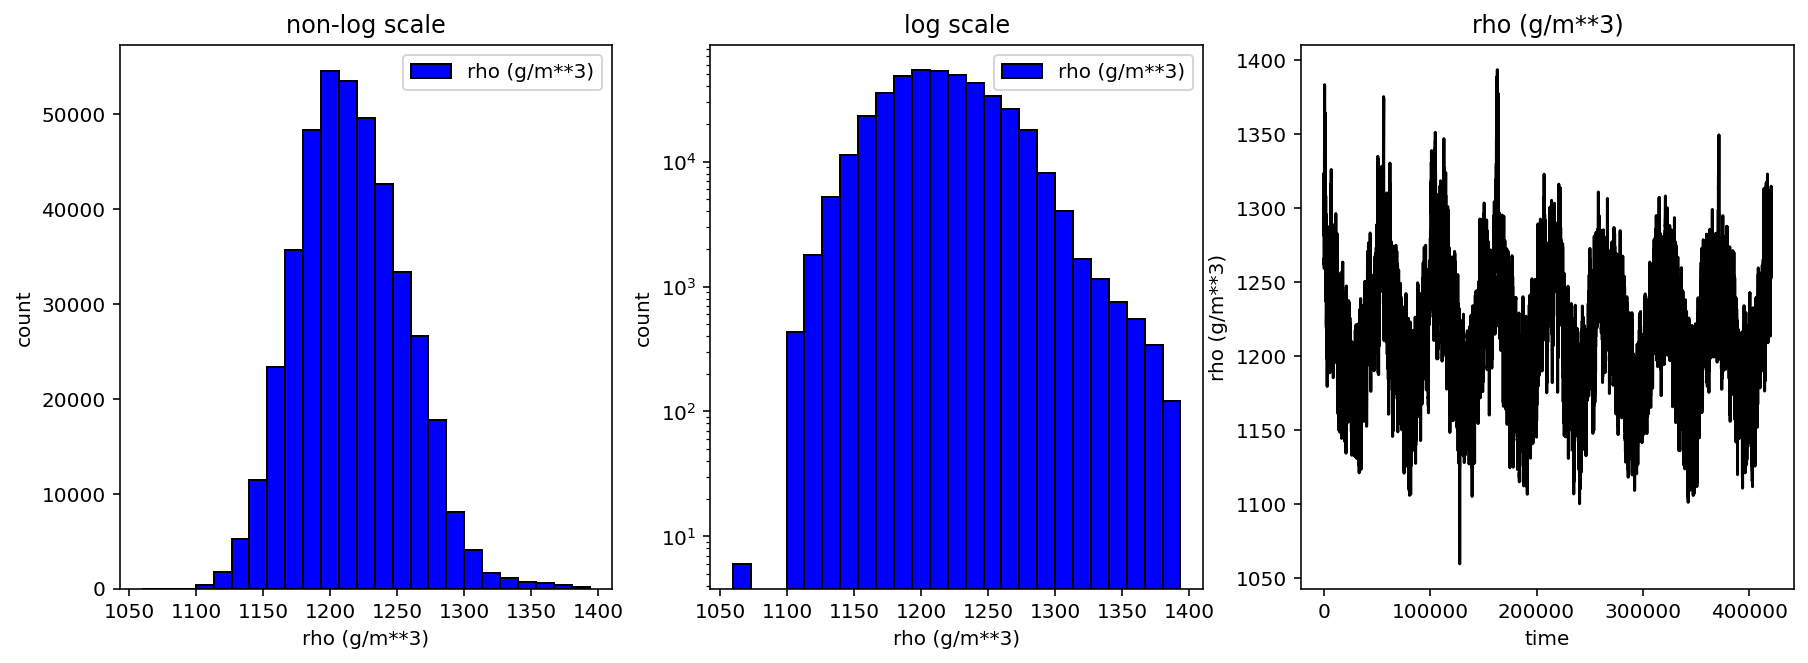

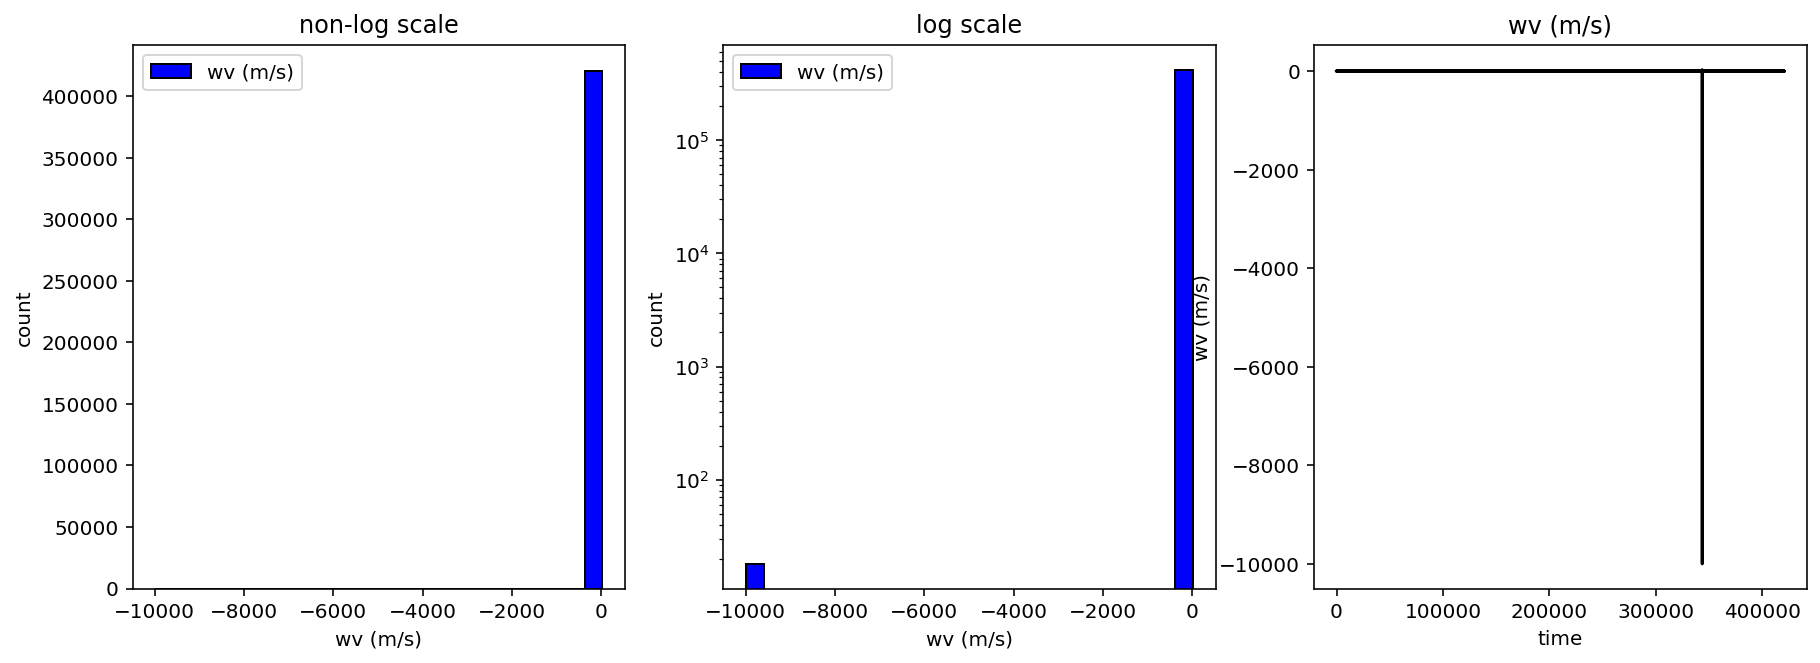

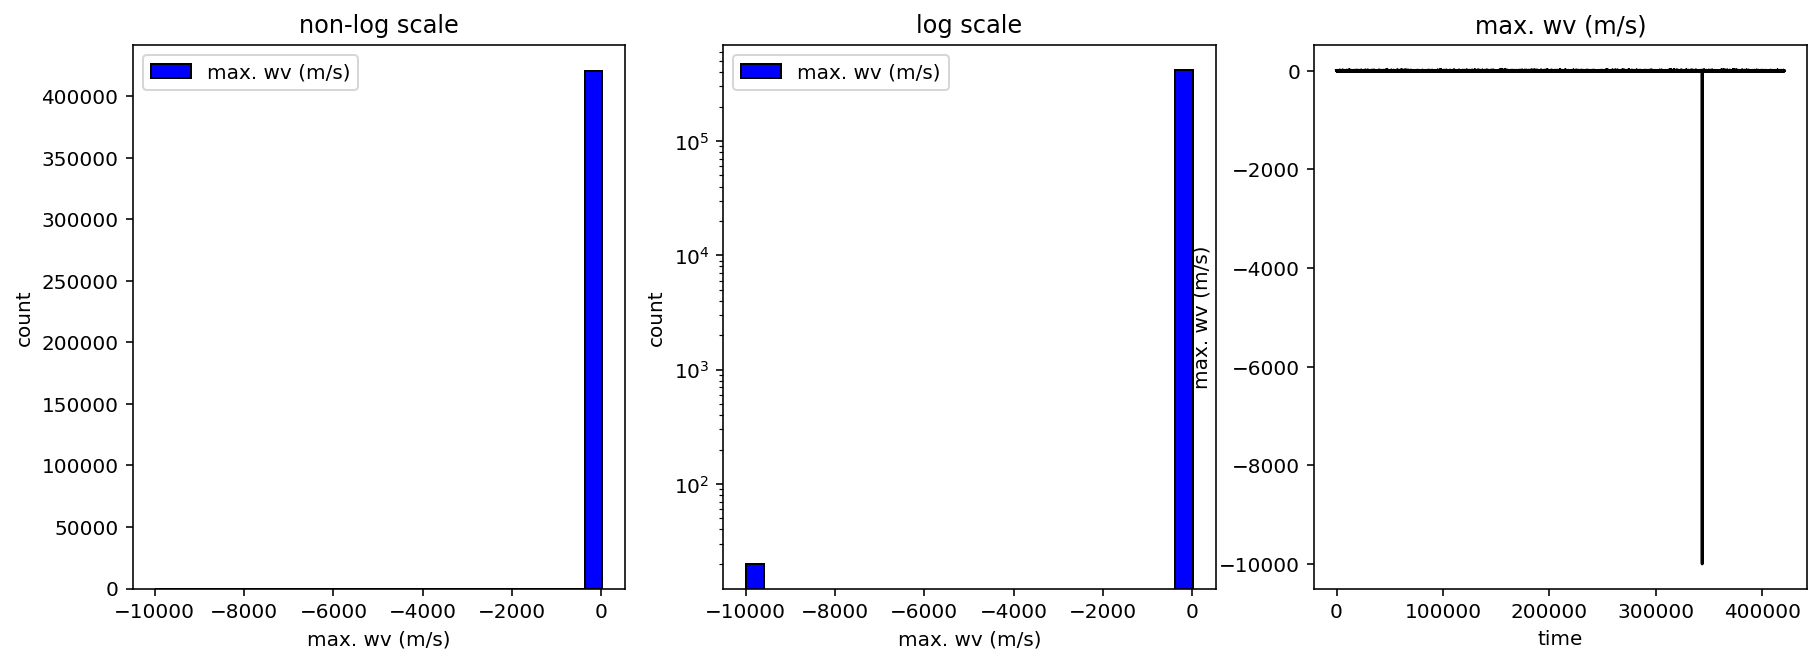

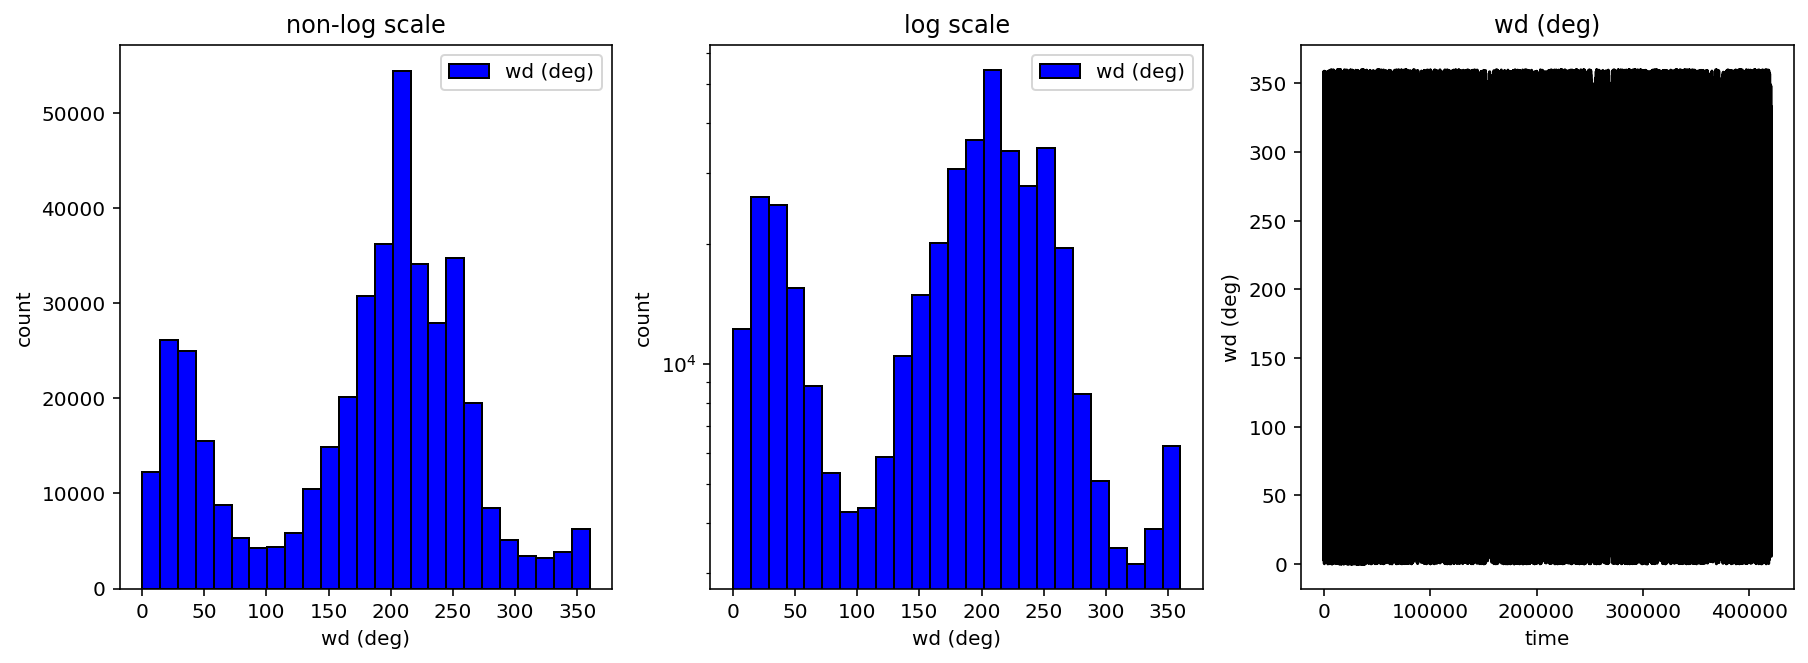

In [19]:
for col in cols:
    plot_df(col)

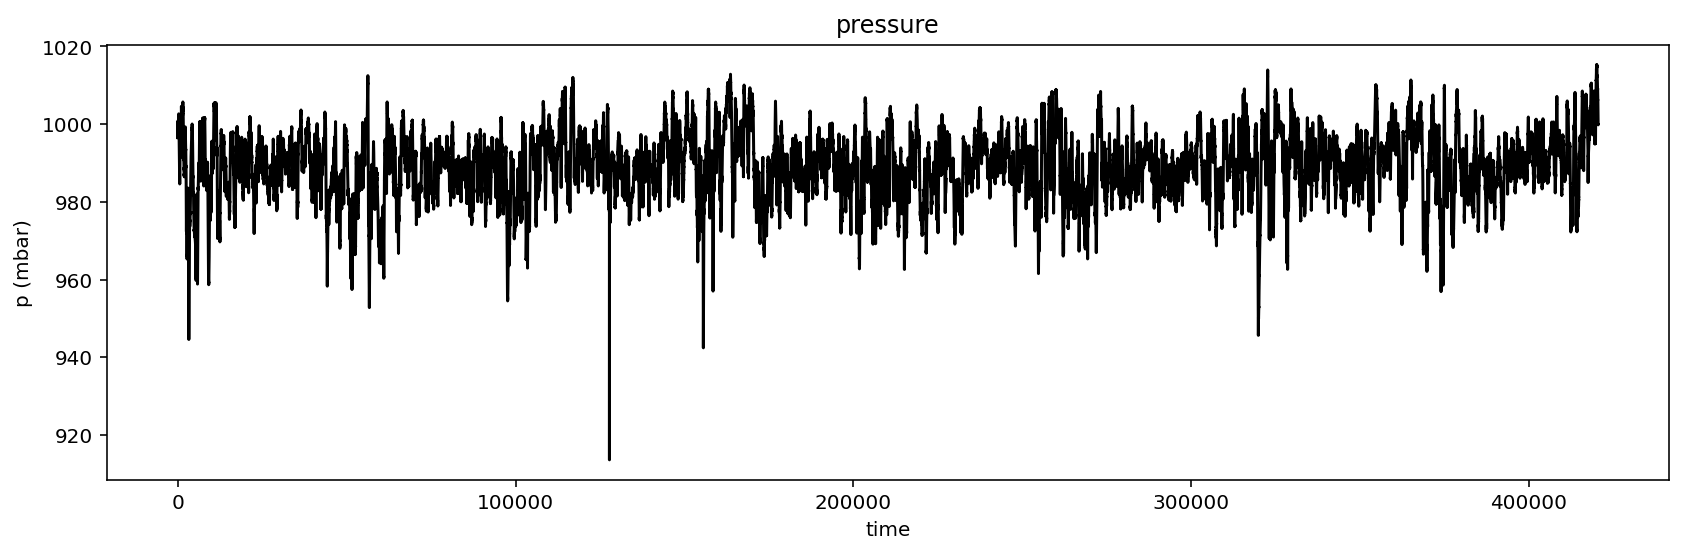

In [20]:
plt.figure(figsize = [14, 4])
plt.plot(df['p (mbar)'],'k-')
plt.xlabel("time")
plt.ylabel("p (mbar)")
plt.title("pressure")
plt.savefig("../Figures/plot_P02_pressure.png")

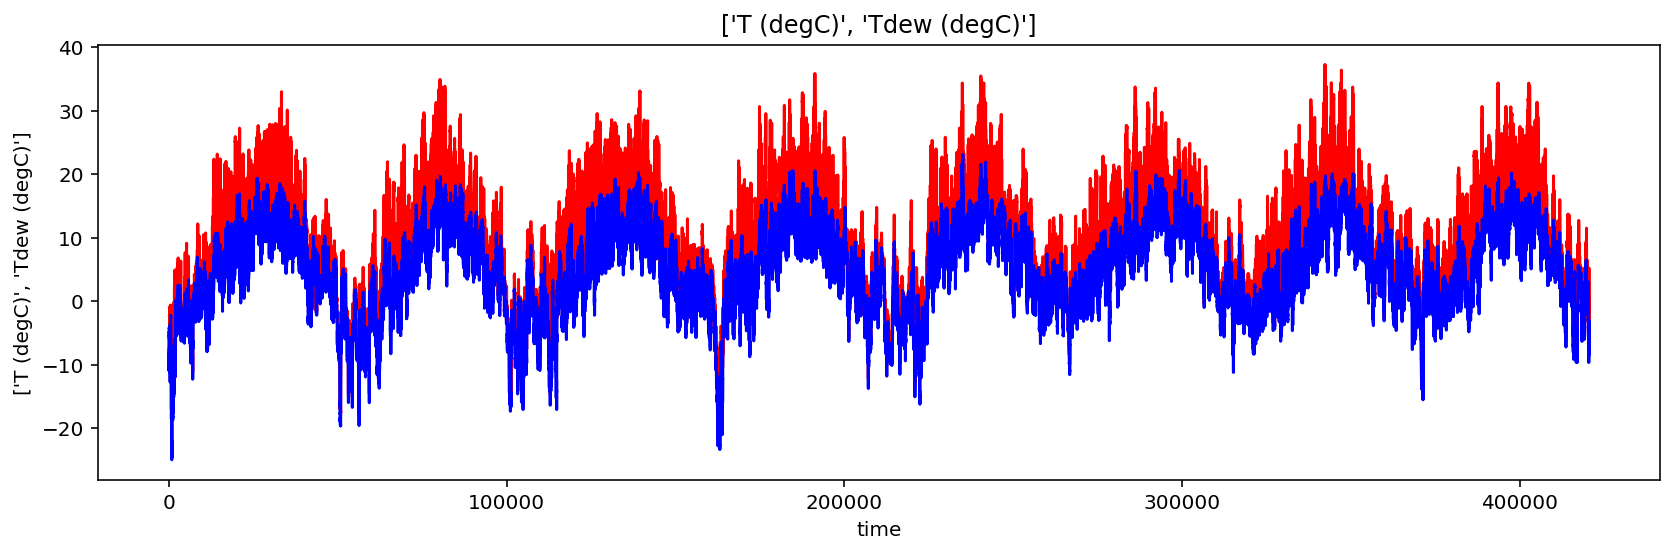

In [21]:
# %config InlineBackend.figure_format = 'retina'
plt.figure(figsize = [14, 4])

# cols = ['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
#        'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
#        'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
#        'wd (deg)']

cols = ['T (degC)', 'Tdew (degC)']
colors = ['r', 'b']

for i,col in enumerate(cols):
    plt.plot(df[col],colors[i])

plt.xlabel("time")
plt.ylabel(cols)
plt.title(cols)
plt.savefig("../Figures/plot_P02_T_(degC)_Tdew_(degC).png")

seasonality trends is observed exccept for parameters: ```['wv (m/s)', 'max. wv (m/s)','wd (deg)']```

Lets check out if the data is stationary. Two methods can be used for evaluating the time series data inclduing, Plotting Rolling Statistics and Dickey-Fuller Test.


In [12]:
# modified ref: https://www.kaggle.com/kanncaa1/time-series-prediction-tutorial-with-eda
# adfuller library 
from statsmodels.tsa.stattools import adfuller

In [13]:
# !/Users/amin/Desktop/proj/env/bin/python -m pip install statsmodels

In [28]:
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
    
# check_mean_std
def check_mean(ts,windo):
    #Rolling statistics
    
    rolmean = pd.Series(ts).rolling(window=windo).mean()
    rolstd = pd.Series(ts).rolling(window=windo).std()
    
    
#     rolmean = pd.rolling_mean(ts, window=6)
#     rolstd = pd.rolling_std(ts, window=6)
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
#     std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Pressure")
    plt.title('Rolling Mean')
    
#     plt.ylim(0,)
    
    plt.legend()
    plt.show()
    
    
    
# check_mean_std
def check_std(ts, windo):
    #Rolling statistics
    
    rolmean = pd.Series(ts).rolling(window=windo).mean()
    rolstd = pd.Series(ts).rolling(window=windo).std()
    
    
#     rolmean = pd.rolling_mean(ts, window=6)
#     rolstd = pd.rolling_std(ts, window=6)
    plt.figure(figsize=(22,10))   
#     orig = plt.plot(ts, color='red',label='Original')
#     mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Pressure")
    plt.title('Rolling Standard Deviation')
    
#     plt.ylim(0,)
    
    plt.legend()
    plt.show()

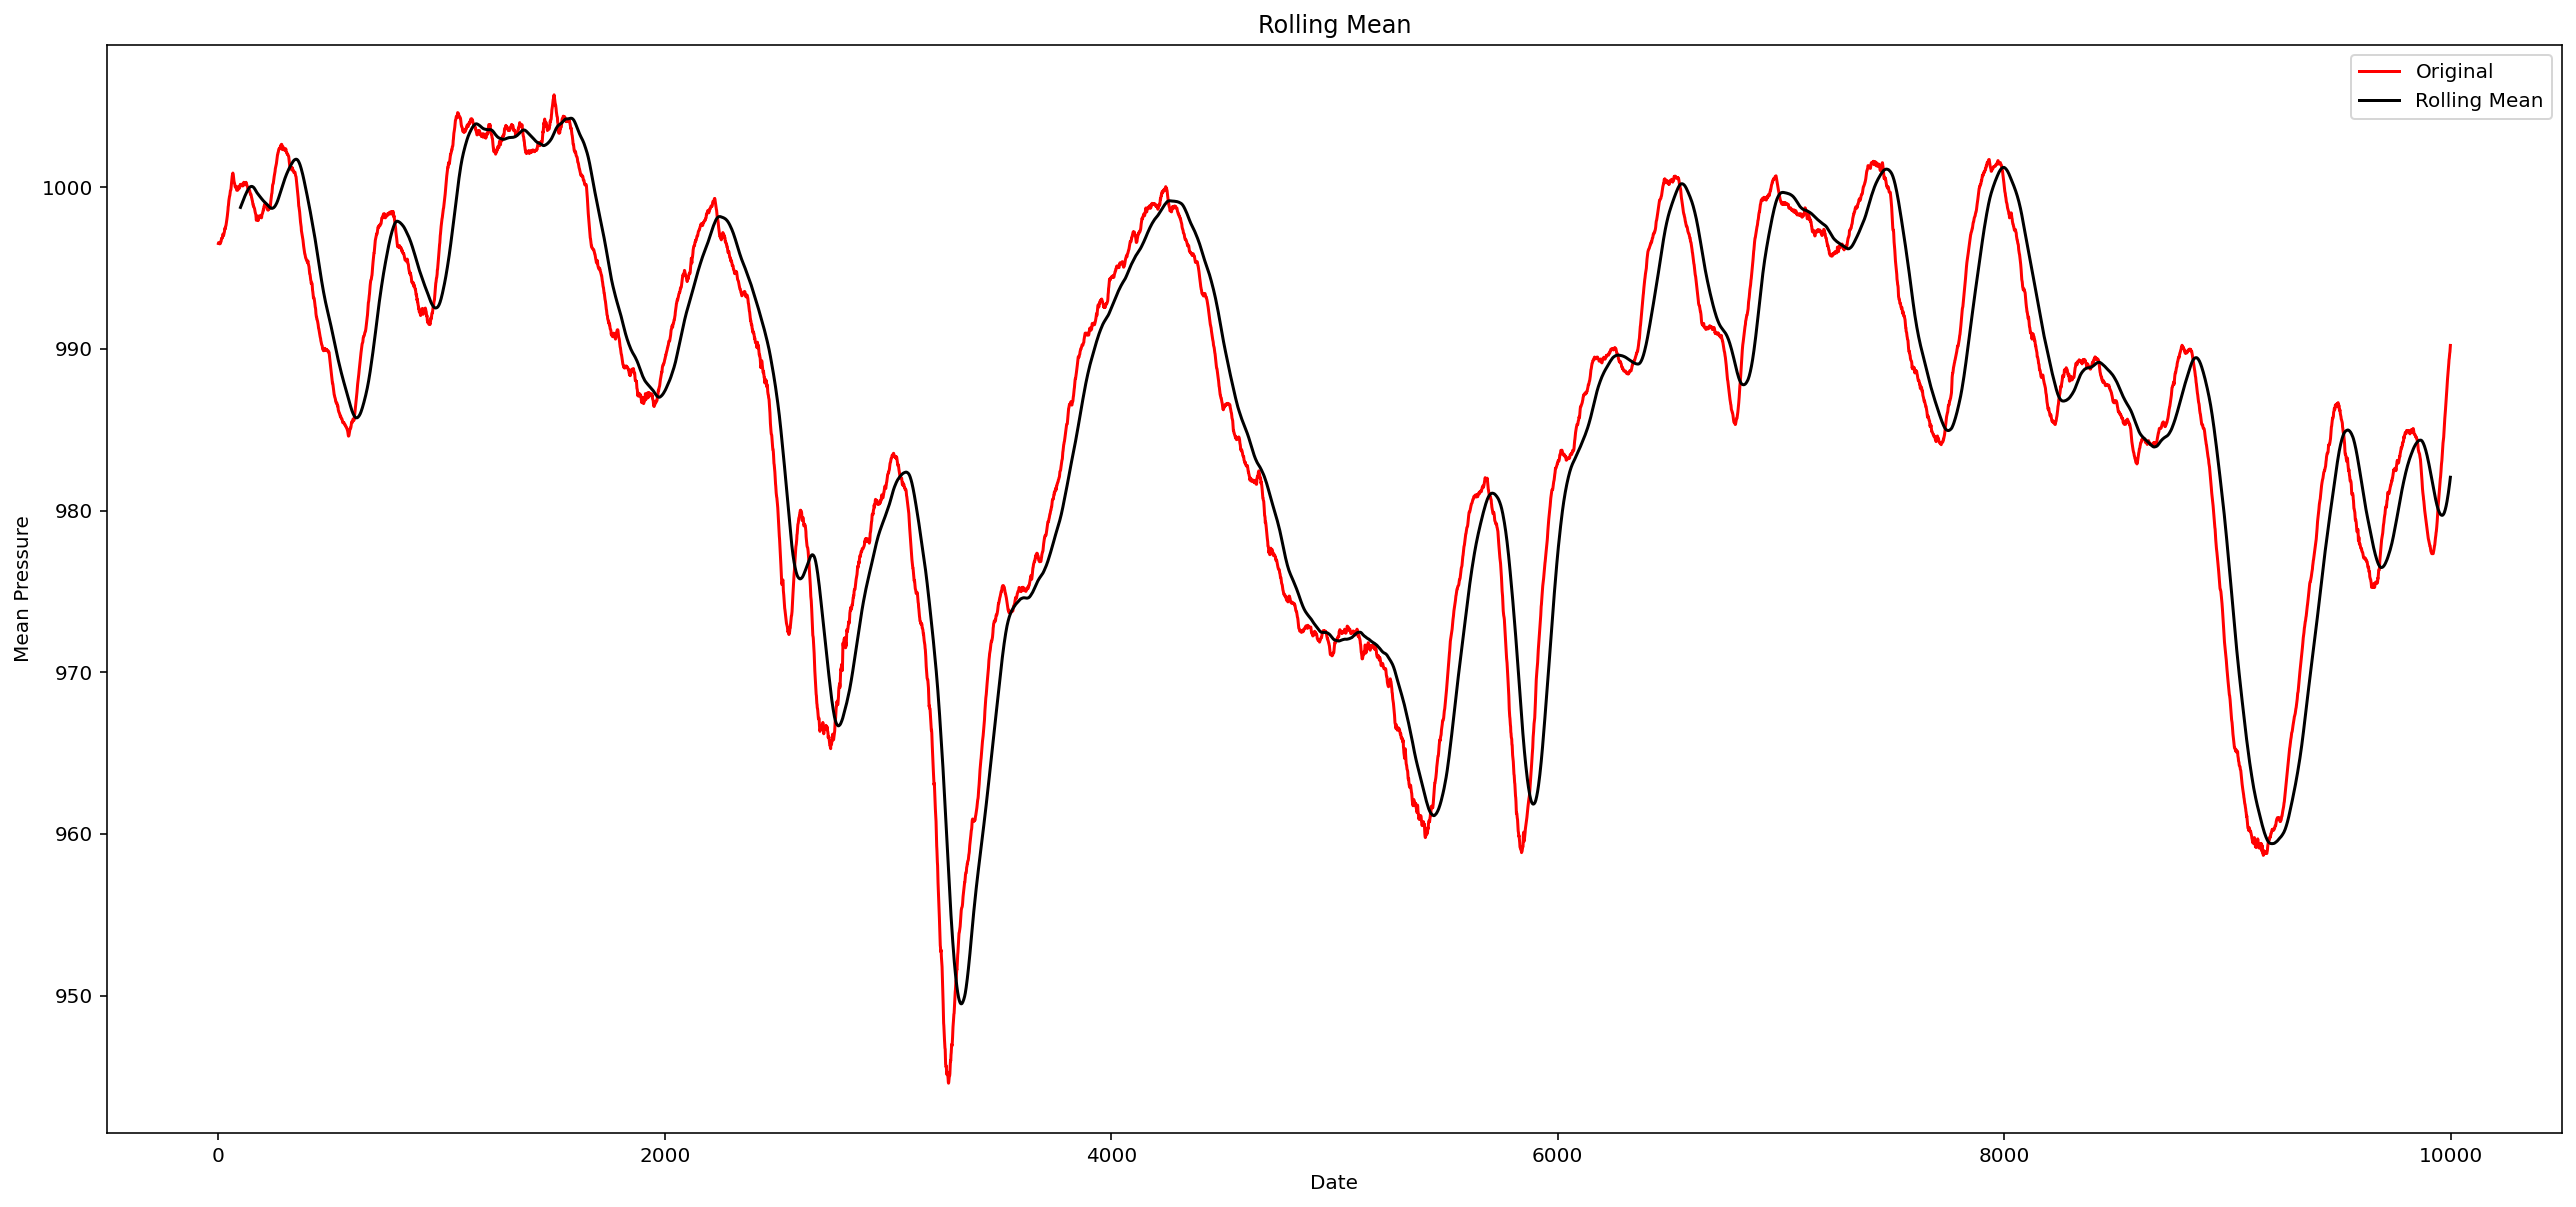

In [32]:
# check stationary: mean, variance(std)and adfuller test
check_mean(df['p (mbar)'][0:10000], windo=100)
# check_adfuller(df['p (mbar)'])

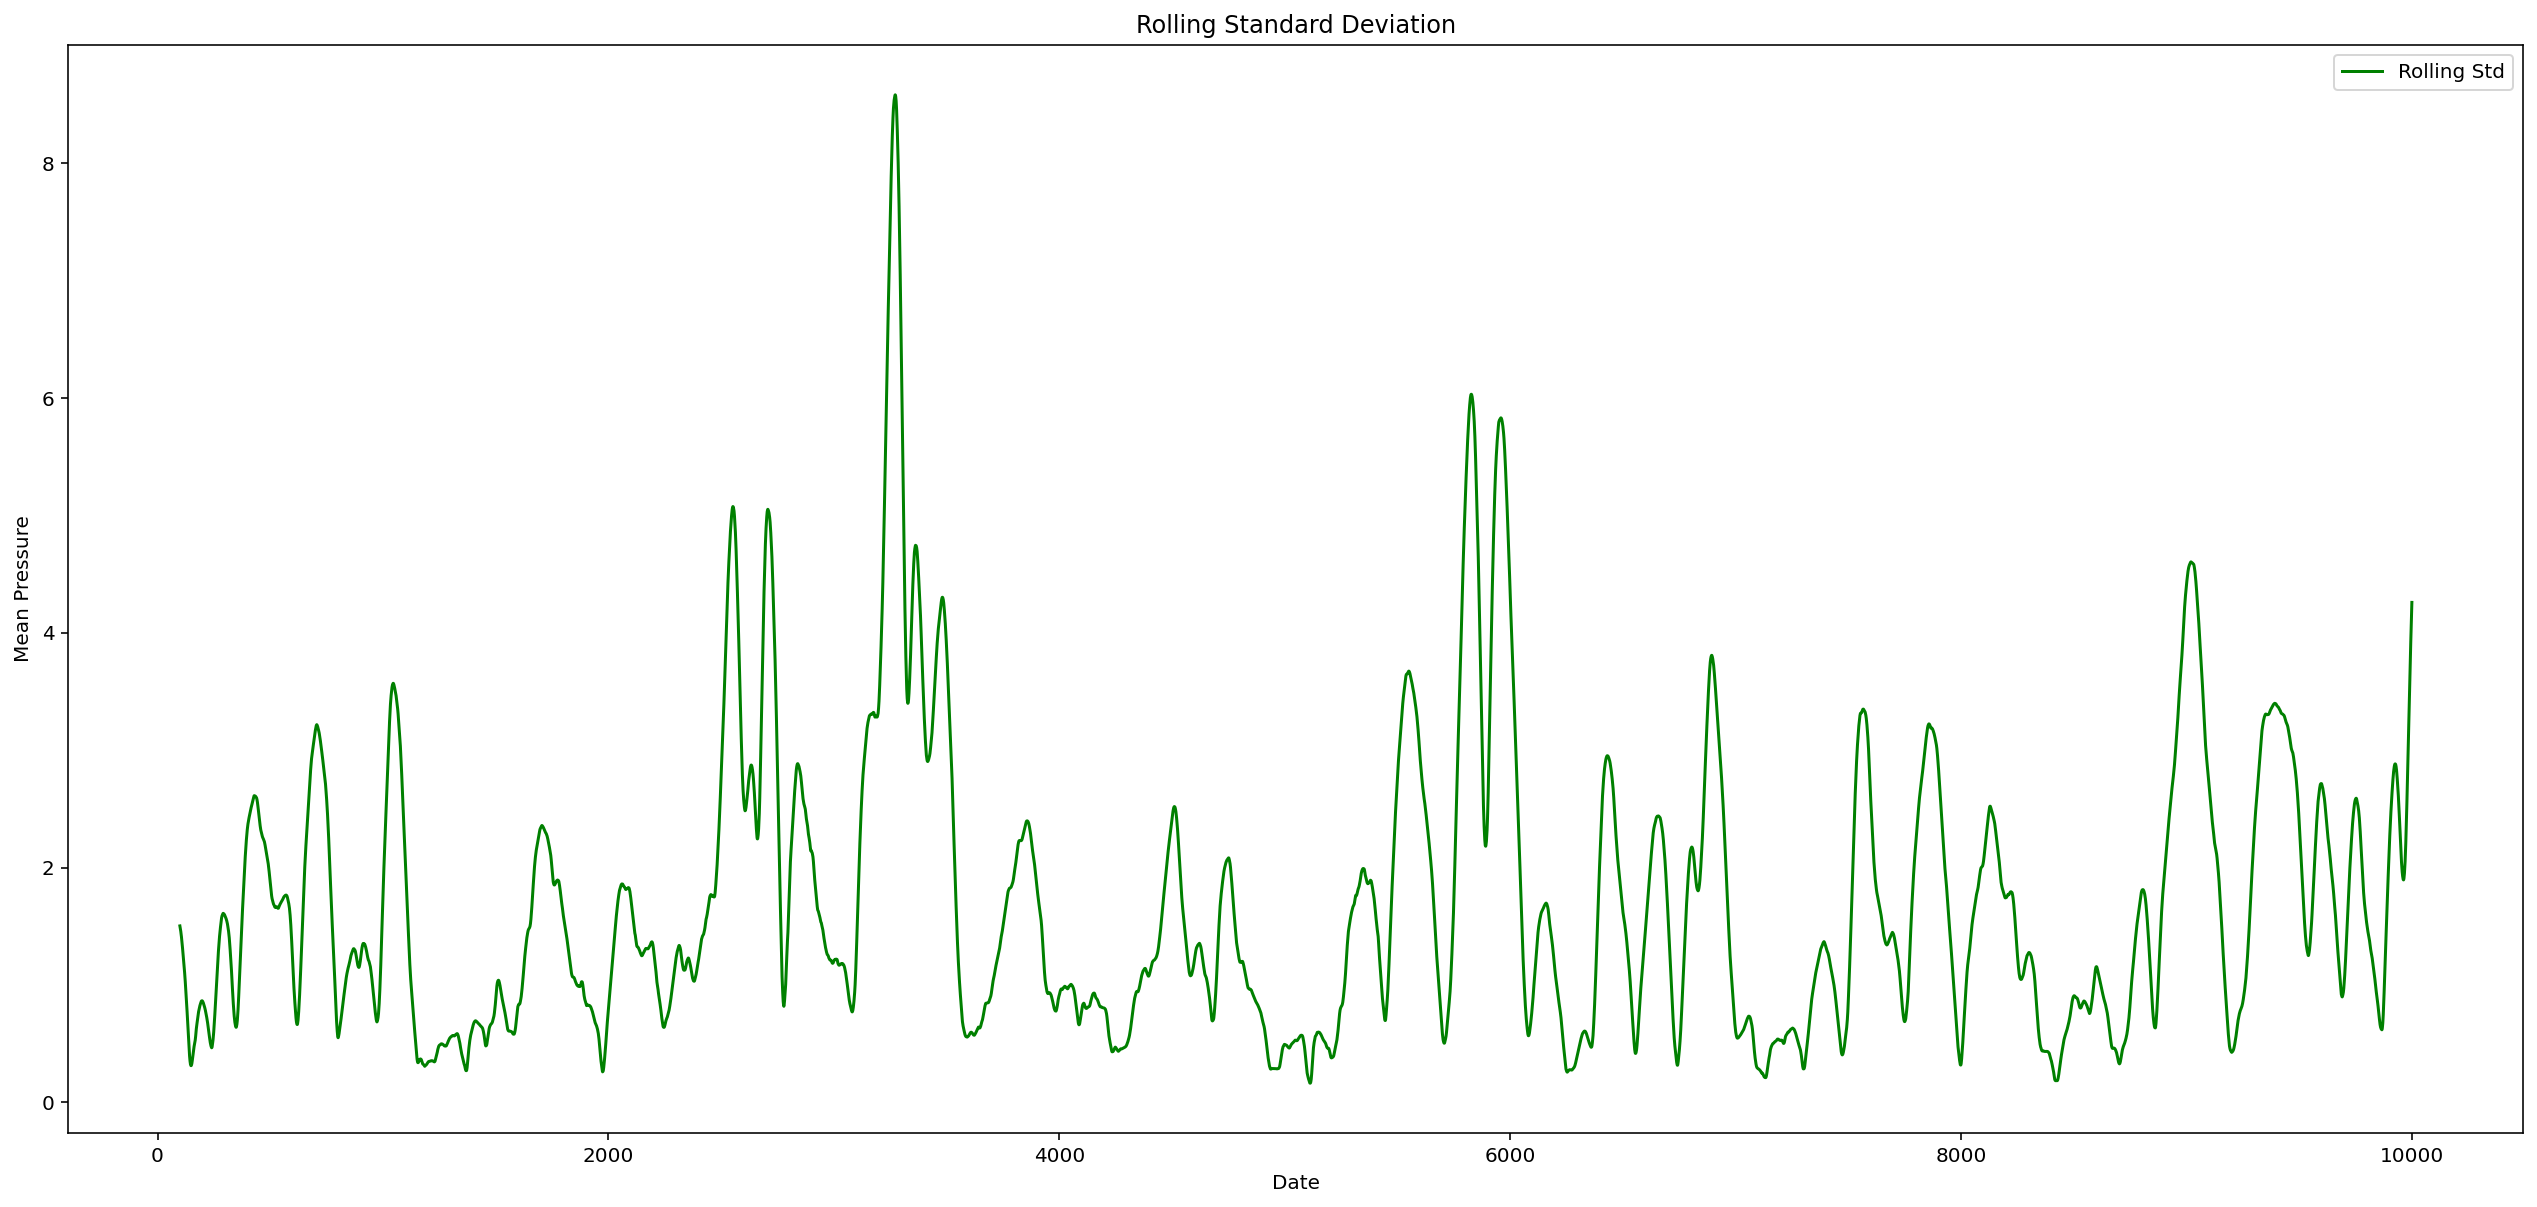

In [33]:
check_std(df['p (mbar)'][0:10000], windo=100)

In [22]:
# df["TimeReviewed"] = pd.to_datetime(df["Date Time"])
# df["TimeReviewed"].head()
# df["TimeReviewed"][1000]

In [23]:
# ['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
#        'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
#        'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
#        'wd (deg)']

In [24]:
# cols = ['p (mbar)', 'T (degC)', 'Tpot (K)', 
#         'Tdew (degC)','rh (%)', 'VPmax (mbar)']
# sns.pairplot(df[cols])
# plt.savefig("../Figures/plot_P02_EDA_pair01.png")
# plt.show()

In [25]:
df.corr().T

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
p (mbar),1.000000,-0.045375,-0.124718,-0.066755,-0.018352,-0.031546,-0.054370,-0.003401,-0.069762,-0.069804,0.307640,-0.005701,-0.007760,-0.063258
T (degC),-0.045375,1.000000,0.996827,0.895708,-0.572416,0.951113,0.867673,0.761744,0.866755,0.867177,-0.963410,-0.004689,-0.002871,0.038732
Tpot (K),-0.124718,0.996827,1.000000,0.894911,-0.567127,0.947293,0.866205,0.756962,0.866533,0.866955,-0.981345,-0.004195,-0.002224,0.043599
Tdew (degC),-0.066755,0.895708,0.894911,1.000000,-0.156615,0.799271,0.968344,0.435752,0.967599,0.968044,-0.885232,-0.008718,-0.009091,0.049877
rh (%),-0.018352,-0.572416,-0.567127,-0.156615,1.000000,-0.615842,-0.151494,-0.843835,-0.150841,-0.150969,0.514282,-0.005020,-0.009921,-0.015912
VPmax (mbar),-0.031546,0.951113,0.947293,0.799271,-0.615842,1.000000,0.824865,0.875588,0.824460,0.824493,-0.901536,-0.004018,-0.002213,-0.009583
VPact (mbar),-0.054370,0.867673,0.866205,0.968344,-0.151494,0.824865,1.000000,0.449154,0.999851,0.999856,-0.850241,-0.009600,-0.010316,0.018418
VPdef (mbar),-0.003401,0.761744,0.756962,0.435752,-0.843835,0.875588,0.449154,1.000000,0.448641,0.448689,-0.698290,0.001852,0.005317,-0.030881
sh (g/kg),-0.069762,0.866755,0.866533,0.967599,-0.150841,0.824460,0.999851,0.448641,1.000000,0.999997,-0.853325,-0.009479,-0.010163,0.019376
H2OC (mmol/mol),-0.069804,0.867177,0.866955,0.968044,-0.150969,0.824493,0.999856,0.448689,0.999997,1.000000,-0.853769,-0.009477,-0.010158,0.019607


Select the parameters considering the corr values.

In [26]:
# (pd.DataFrame(df.corr().T['p (mbar)'])).size
# (pd.DataFrame(df.corr().T['p (mbar)']))
# df.corr().T['p (mbar)'].size

# df.corr().T['p (mbar)']

In [27]:
df.corr().T['p (mbar)'].mean()

0.0533456593950841

In [28]:
cols = ['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)']

In [29]:
counter = 0
selected_pars = []
for i in list(df.corr().T['p (mbar)']):
    counter +=1
    if i > 0.05 or i < -0.05:
#         print(cols[counter])
#         print(i,'\n')
        selected_pars.append(cols[counter])
selected_pars  

['p (mbar)',
 'Tpot (K)',
 'Tdew (degC)',
 'VPact (mbar)',
 'sh (g/kg)',
 'H2OC (mmol/mol)',
 'rho (g/m**3)',
 'wd (deg)']

Let's narrow down the corr upper and lower values so the relationship between parameters in the heatmap plot would be more clear.

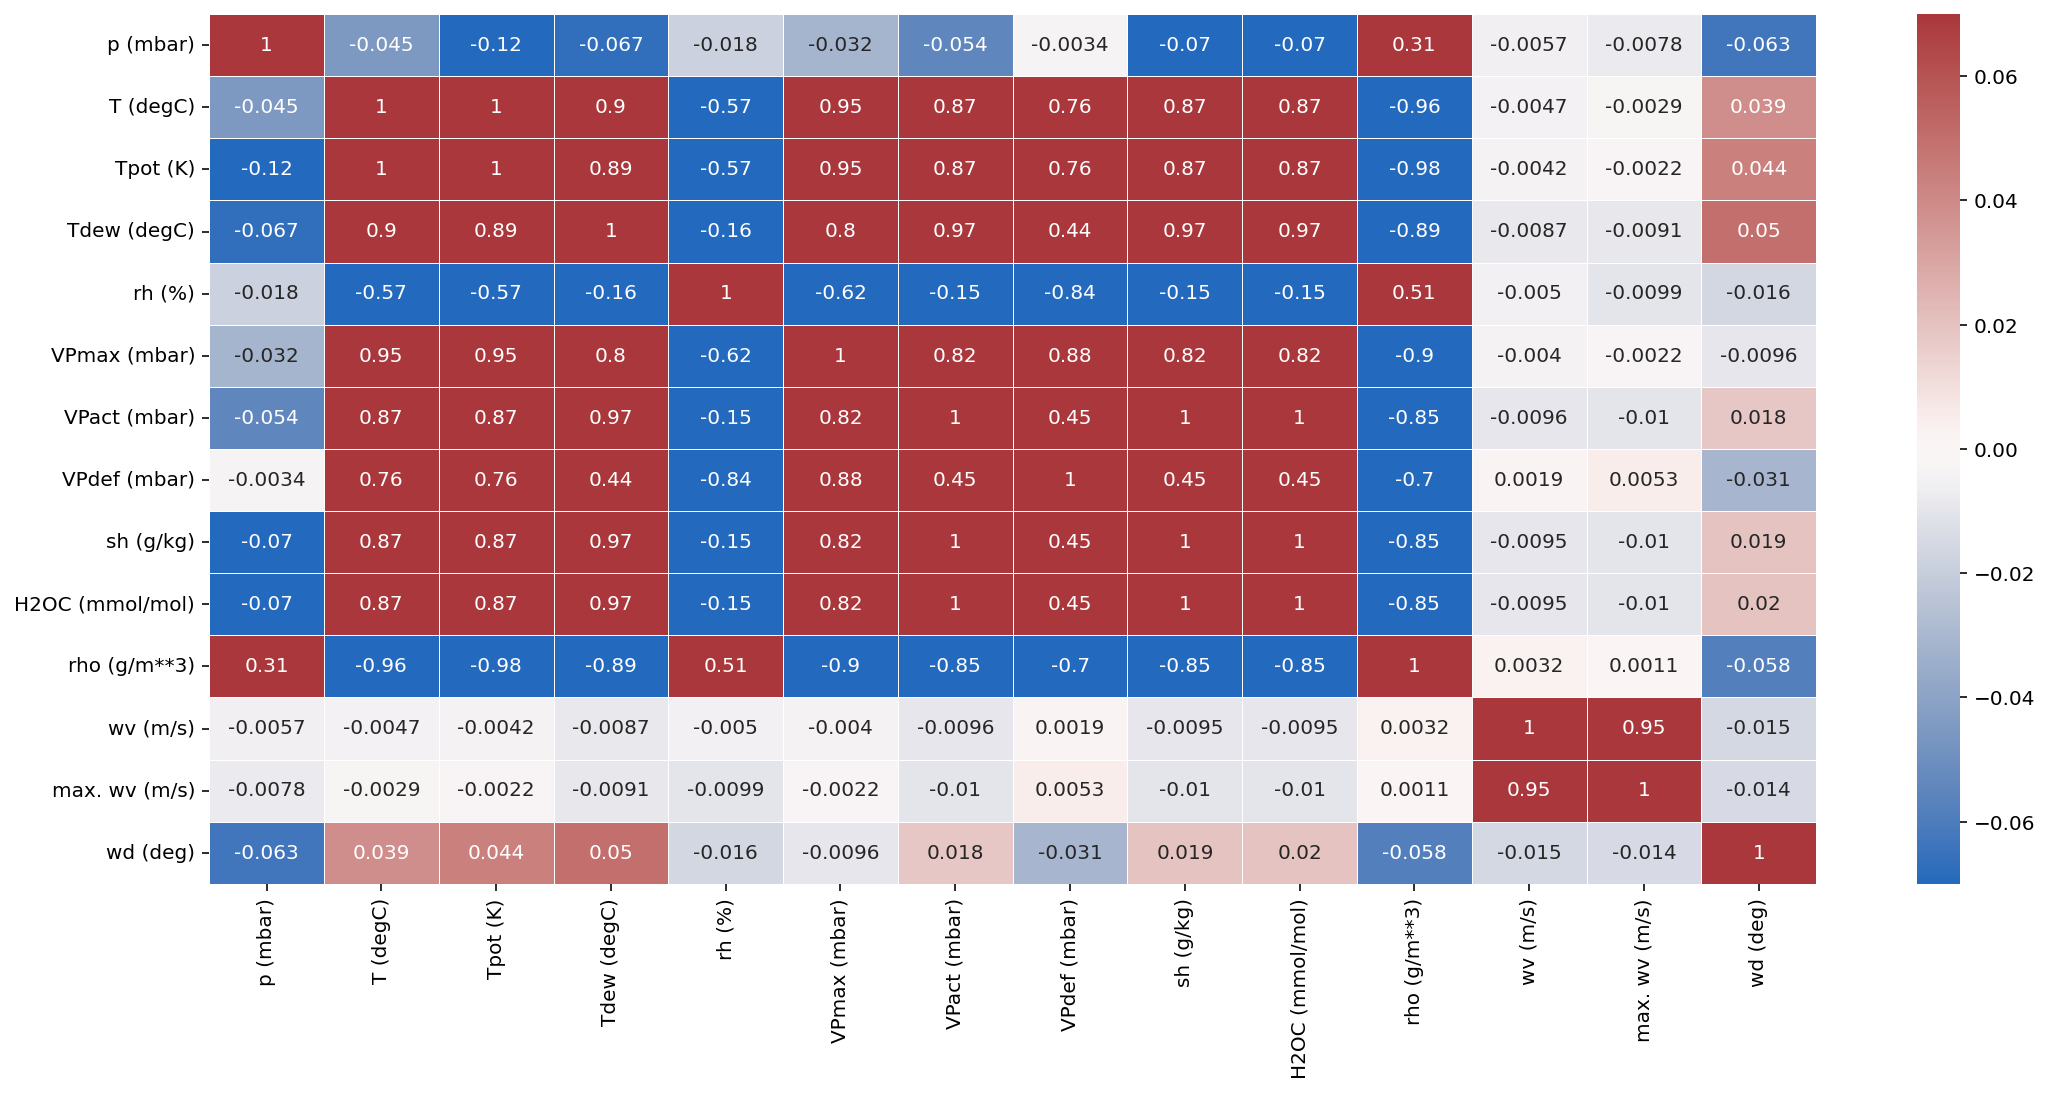

In [36]:
df_corr = df.corr()
plt.figure(figsize=(18,8))

sns.heatmap(df_corr, 
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,
            cmap='vlag',
            annot=True,
            linewidth=0.5, center=0,
            vmin=-0.07, vmax=0.07
           )
plt.savefig("../Figures/plot_P02_EDA_corr.png")

The essential parameters to be considered for modeling are as follows.

```
'p (mbar)','Tpot (K)','Tdew (degC)','VPact (mbar)','sh (g/kg)','H2OC (mmol/mol)','rho (g/m**3)','wd (deg)'
```